<a href="https://colab.research.google.com/github/bilalzardoa/machine-learning/blob/main/beerdraft_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gsutil -m cp -R gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data .

Copying gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data/eval/0chimayblue/000.jpg...
Copying gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data/eval/0chimayblue/002.jpg...
Copying gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data/eval/0chimayblue/003.jpg...
Copying gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data/eval/0chimayblue/001.jpg...
Copying gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data/eval/0chimayblue/004.jpg...
Copying gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data/eval/0chimayblue/005.jpg...
Copying gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data/eval/0chimayblue/007.jpg...
Copying gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data/eval/0chimayblue/006.jpg...
Copying gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data/eval/0chimayblue/008.jpg...
Copying gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data/eval/0chimayblue/009.jpg...
Copying gs://ml6_junior_ml_engineer_challenge_cv_beer_data/data/eval/0chimayblue

In [2]:
import numpy as np
import os, cv2
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [3]:
train_dir = "/content/data/train"
eval_dir = "/content/data/eval"

def load_images_from_dir(data_dir):
    X, y = [], []
    class_names = sorted(os.listdir(data_dir))
    for idx, class_name in enumerate(class_names):
        folder = os.path.join(data_dir, class_name)
        for file in os.listdir(folder):
            img_path = os.path.join(folder, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR → RGB
                X.append(img)
                y.append(idx)
    return np.array(X, dtype="float32") / 255.0, np.array(y), class_names

# Load training data
X, y, class_names = load_images_from_dir(train_dir)

# Train/Val split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, stratify=y, random_state=42
)

# Load Eval data (as Test set)
X_test, y_test, _ = load_images_from_dir(eval_dir)

print("Classes:", class_names)
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)


Classes: ['0chimayblue', '1orval', '2rochefort10', '3westmalletripel', '4westvleteren12']
X_train: (450, 160, 160, 3) y_train: (450,)
X_val: (50, 160, 160, 3) y_val: (50,)
X_test: (125, 160, 160, 3) y_test: (125,)


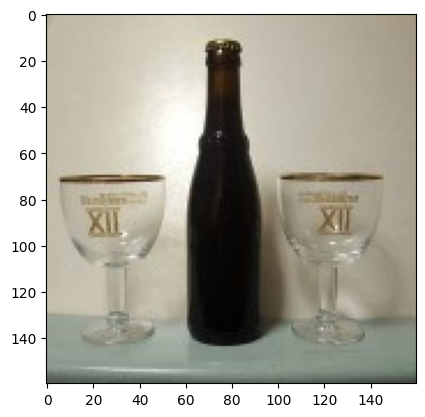

In [4]:
plt.imshow(X_train[0])

In [5]:
# data augmentation doesnt work here ,it just introduces noise
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Fit on X_train
# train_gen = train_datagen.flow(X_train, y_train, batch_size=16)

In [6]:
base_model = tf.keras.applications.MobileNetV2(
  input_shape=(160,160,3),
  include_top=False,
  weights='imagenet'
)
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
def get_model(input_layer,base_model):

  x = input_layer
  # the base model already has batchNorm blocks
  x = base_model(x)
  x = keras.layers.GlobalAveragePooling2D()(x)
  x = keras.layers.Dropout(0.4)(x)
  x = keras.layers.Dense(256,activation='relu')(x)
  x = keras.layers.Dropout(0.5)(x)
  outputs = keras.layers.Dense(5,activation='softmax')(x)

  model = keras.Model(input_layer,outputs)

  return model

In [9]:
input_layer = keras.layers.Input(shape=(160,160,3))

In [10]:
model = get_model(input_layer,base_model)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [11]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

callbacks = [
      keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
  ]


In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    callbacks=callbacks
    )
loss, acc = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 837ms/step - accuracy: 0.2060 - loss: 2.2473 - val_accuracy: 0.4600 - val_loss: 1.4490
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2464 - loss: 1.8395 - val_accuracy: 0.5000 - val_loss: 1.2769
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3261 - loss: 1.7079 - val_accuracy: 0.5800 - val_loss: 1.1709
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3839 - loss: 1.5477 - val_accuracy: 0.6400 - val_loss: 1.0895
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4051 - loss: 1.4687 - val_accuracy: 0.6800 - val_loss: 1.0315
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5011 - loss: 1.2533 - val_accuracy: 0.6800 - val_loss: 0.9640
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5230 - loss: 1.2060 - val_accuracy: 0.6800 - val_loss: 0.9158
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5443 - loss: 1.1309 - val_accuracy: 0.7400 -

In [13]:
def plot_history_smooth(history):
    epochs = range(1, len(history.history['accuracy']) + 1)

    # Plot accuracy
    plt.figure(figsize=(10,4))
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Train Acc')
    if 'val_accuracy' in history.history:
        plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Val Acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot loss
    plt.figure(figsize=(10,4))
    plt.plot(epochs, history.history['loss'], 'bo-', label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(epochs, history.history['val_loss'], 'ro-', label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

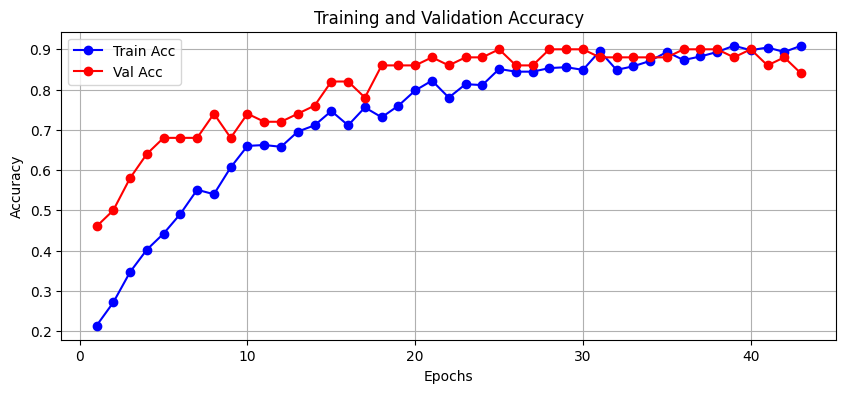

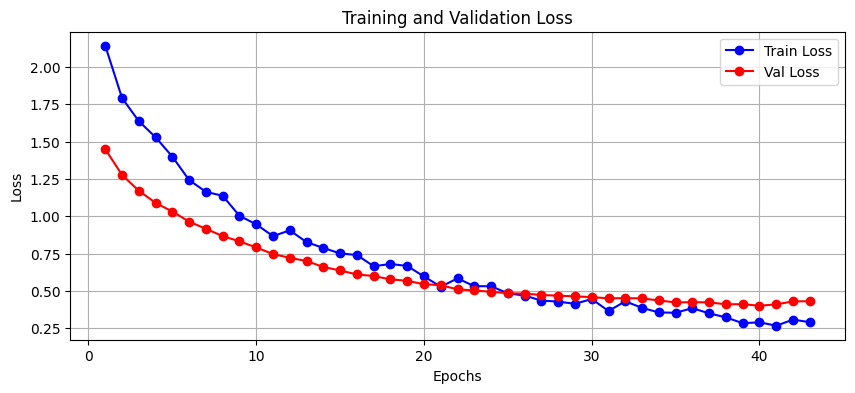

In [14]:
plot_history_smooth(history)

In [15]:
base_model.trainable = True

for layer in base_model.layers[:-15]:
  layer.trainable = False


fine_tuned_model = get_model(input_layer,base_model)

fine_tuned_model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )

callbacks = [
      keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
  ]

history = fine_tuned_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    callbacks=callbacks
    )
loss, acc = fine_tuned_model.evaluate(X_test, y_test, verbose=1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 31s 638ms/step - accuracy: 0.2195 - loss: 2.3539 - val_accuracy: 0.1600 - val_loss: 1.9998
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2158 - loss: 2.2262 - val_accuracy: 0.2000 - val_loss: 1.8870
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3028 - loss: 1.9414 - val_accuracy: 0.2000 - val_loss: 1.7899
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2678 - loss: 1.8876 - val_accuracy: 0.2600 - val_loss: 1.7053
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2695 - loss: 1.8760 - val_accuracy: 0.2400 - val_loss: 1.6285
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3431 - loss: 1.6309 - val_accuracy: 0.2800 - val_loss: 1.5570
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3500 - loss: 1.7147 - val_accuracy: 0.3000 - val_loss: 1.4841
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3695 - loss: 1.6177 - val_accuracy: 0.3800 -

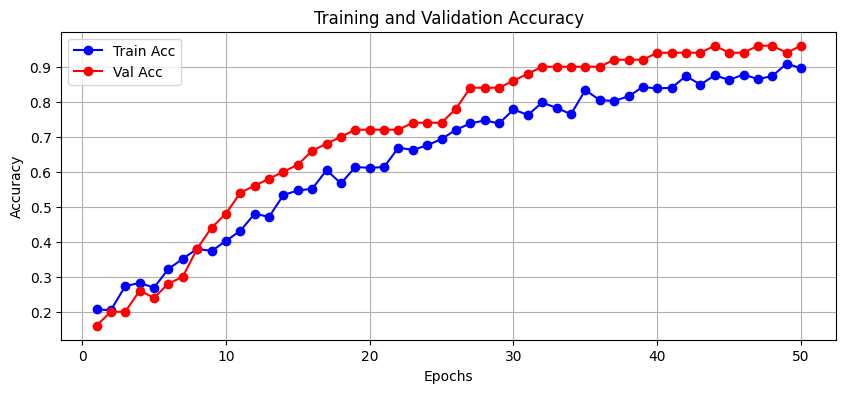

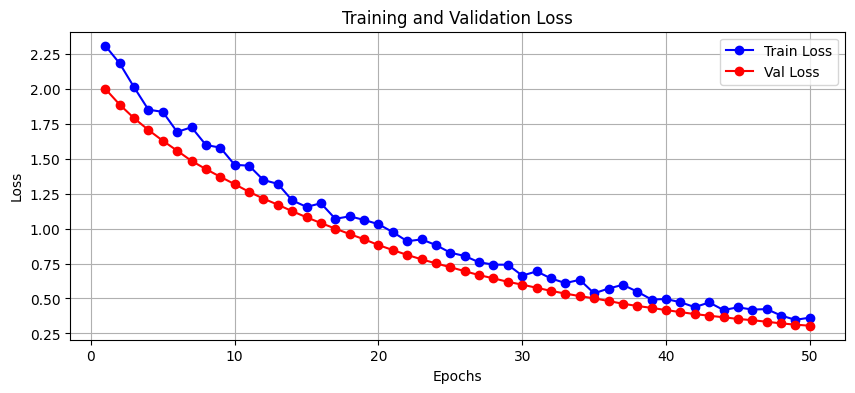

In [16]:
plot_history_smooth(history)